In [82]:
import pandas as pd

df = pd.read_csv('C:/datasets/housepricedata.csv')

In [83]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [84]:
dataset = df.values

In [85]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

In [110]:
X = df.iloc[:,:10]
Y = df.iloc[:,10]
X = X.values
#X = X.reshape(-1, 1)
#Y = Y.reshape(-1, 1)

In [111]:
print(X.shape)

(1460, 10)


In [112]:
from sklearn import preprocessing

In [113]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [114]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [115]:
from sklearn.model_selection import train_test_split

In [116]:
#X.shape
Y.shape

(1460,)

In [117]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [118]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [119]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [120]:
from keras.models import Sequential
from keras.layers import Dense

In [121]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [122]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [123]:
hist = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 26s 31ms/step - loss: 0.6865 - accuracy: 0.4903 - val_loss: 0.6752 - val_accuracy: 0.5479
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6836 - accuracy: 0.4851 - val_loss: 0.6716 - val_accuracy: 0.5479
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6774 - accuracy: 0.4986 - val_loss: 0.6678 - val_accuracy: 0.5479
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6726 - accuracy: 0.5087 - val_loss: 0.6639 - val_accuracy: 0.5799
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6734 - accuracy: 0.5315 - val_loss: 0.6597 - val_accuracy: 0.6484
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6654 - accuracy: 0.6135 - val_loss: 0.6555 - val_accuracy: 0.7078
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6597 - accuracy: 0.7195 - val_loss: 0.6513 - val_accuracy: 0.7626
Epoch 8/100

In [124]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8767


0.8767123222351074

In [125]:
import matplotlib.pyplot as plt

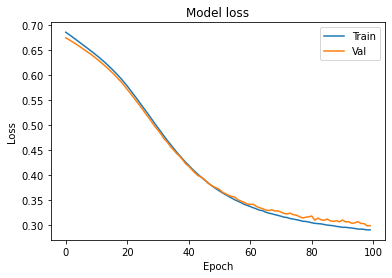

In [126]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

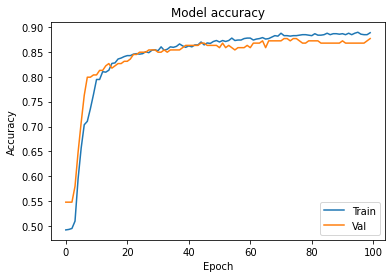

In [128]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [129]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [130]:
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [131]:
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 7s 46ms/step - loss: 0.5238 - accuracy: 0.7612 - val_loss: 0.3651 - val_accuracy: 0.8584
Epoch 2/100
32/32 [==============================] - 1s 27ms/step - loss: 0.3421 - accuracy: 0.8739 - val_loss: 0.3532 - val_accuracy: 0.8584
Epoch 3/100
32/32 [==============================] - 1s 28ms/step - loss: 0.3107 - accuracy: 0.8752 - val_loss: 0.3436 - val_accuracy: 0.8493
Epoch 4/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2743 - accuracy: 0.8790 - val_loss: 0.3272 - val_accuracy: 0.8539
Epoch 5/100
32/32 [==============================] - 1s 29ms/step - loss: 0.2897 - accuracy: 0.8850 - val_loss: 0.3079 - val_accuracy: 0.8721
Epoch 6/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2597 - accuracy: 0.8863 - val_loss: 0.3563 - val_accuracy: 0.8584
Epoch 7/100
32/32 [==============================] - 1s 28ms/step - loss: 0.2577 - accuracy: 0.8907 - val_loss: 0.4570 - val_accuracy: 0.8356
Epoch 

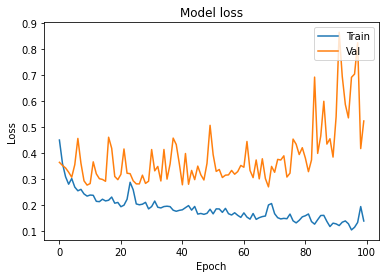

In [132]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

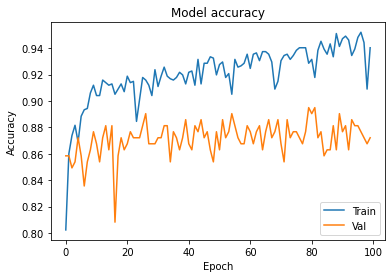

In [134]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [135]:
from keras.layers import Dropout
from keras import regularizers

In [136]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [137]:
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [138]:
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Epoch 1/100
32/32 [==============================] - 5s 60ms/step - loss: 21.1347 - accuracy: 0.5880 - val_loss: 3.8626 - val_accuracy: 0.7991
Epoch 2/100
32/32 [==============================] - 1s 39ms/step - loss: 2.4884 - accuracy: 0.8221 - val_loss: 0.7755 - val_accuracy: 0.8128
Epoch 3/100
32/32 [==============================] - 1s 40ms/step - loss: 0.6490 - accuracy: 0.8453 - val_loss: 0.5263 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 38ms/step - loss: 0.5370 - accuracy: 0.8620 - val_loss: 0.5228 - val_accuracy: 0.8493
Epoch 5/100
32/32 [==============================] - 1s 38ms/step - loss: 0.5046 - accuracy: 0.8790 - val_loss: 0.5076 - val_accuracy: 0.8493
Epoch 6/100
32/32 [==============================] - 1s 38ms/step - loss: 0.4720 - accuracy: 0.8811 - val_loss: 0.4862 - val_accuracy: 0.8676
Epoch 7/100
32/32 [==============================] - 1s 39ms/step - loss: 0.4585 - accuracy: 0.8952 - val_loss: 0.4590 - val_accuracy: 0.8721
Epoch

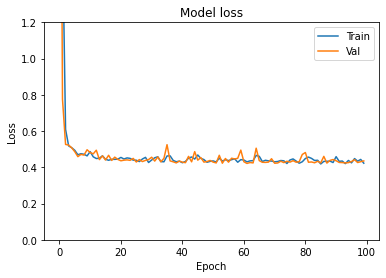

In [139]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

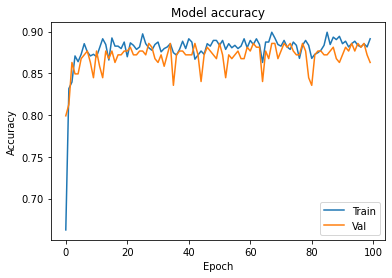

In [141]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()